In [1]:
import json
import pickle
import os

import matplotlib
matplotlib.rcParams.update({'font.size': 18})

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from coffea import hist

In [2]:
year = '2018'
if not os.path.isdir(year):
    os.mkdir(year)
    
pickle_path = '../../output/pickle/vhbb_v5/'+year+'/ParticleNet_msd.pkl'

In [3]:
h = pickle.load(open(pickle_path,'rb')).integrate('region','signal').integrate('systematic','nominal')
h.identifiers('process')

[<StringBin (VBFDipoleRecoilOff) instance at 0x7f9c37d85250>,
 <StringBin (VBFDipoleRecoilOn) instance at 0x7f9c37d852b0>,
 <StringBin (VV) instance at 0x7f9cadddf460>,
 <StringBin (WH) instance at 0x7f9c37d85310>,
 <StringBin (Wjets) instance at 0x7f9cadddf3a0>,
 <StringBin (ZH) instance at 0x7f9c37d85370>,
 <StringBin (Zjets) instance at 0x7f9cadddfca0>,
 <StringBin (ZjetsHT) instance at 0x7f9cadddfe20>,
 <StringBin (ggF) instance at 0x7f9c37d851f0>,
 <StringBin (singlet) instance at 0x7f9cadddf9a0>,
 <StringBin (ttH) instance at 0x7f9c37d853a0>,
 <StringBin (ttbarBoosted) instance at 0x7f9cadddf760>]

In [4]:
ParticleNet_WorkingPoints = {
    '2016APV_bb':    [0.0, 0.9088, 0.9737, 0.9883],
    '2016APV_cc':    [0.0, 0.9252, 0.9751, 0.9909],

    '2016_bb': [0.0, 0.9137, 0.9735, 0.9883],
    '2016_cc': [0.0, 0.9252, 0.9743, 0.9905],

    '2017_bb':    [0.0, 0.9105, 0.9714, 0.9870],
    '2017_cc':    [0.0, 0.9347, 0.9765, 0.9909],

    '2018_bb':    [0.0, 0.9172, 0.9734, 0.9880],
    '2018_cc':    [0.0, 0.9368, 0.9777, 0.9917]
}

ddbthr = ParticleNet_WorkingPoints[year+'_bb'][-1]
print(ddbthr)

0.988


In [5]:
vh = h.integrate('process',['WH','ZH']).integrate('bb1',int_range=slice(ddbthr,1))

In [6]:
ggf = h.integrate('process','ggF').integrate('bb1',int_range=slice(ddbthr,1))

In [7]:
vbf = h.integrate('process','VBFDipoleRecoilOn').integrate('bb1',int_range=slice(ddbthr,1))

In [8]:
tth = h.integrate('process','ttH').integrate('bb1',int_range=slice(ddbthr,1))

In [9]:
vv = h.integrate('process','VV').integrate('bb1',int_range=slice(ddbthr,1))

In [10]:
zjets = h.integrate('process','Zjets').integrate('bb1',int_range=slice(ddbthr,1))

In [11]:
wjets = h.integrate('process','Wjets').integrate('bb1',int_range=slice(ddbthr,1))

In [12]:
ttbar = h.integrate('process','ttbarBoosted').integrate('bb1',int_range=slice(ddbthr,1))

In [13]:
singlet = h.integrate('process','singlet').integrate('bb1',int_range=slice(ddbthr,1))

In [14]:
labels = ['unmatched','light','charm','bottom']

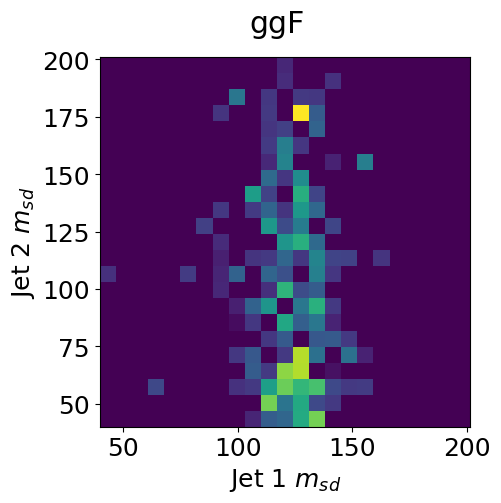

In [15]:
plt.imshow(ggf.sum('genflavor1','genflavor2').values()[()].transpose(),extent=[40,201,40,201],origin='lower')
plt.suptitle('ggF')
plt.xlabel(r'Jet 1 $m_{sd}$')
plt.ylabel(r'Jet 2 $m_{sd}$')
plt.savefig(year+'/ggf_pass_msd1_msd2.pdf',bbox_inches='tight')

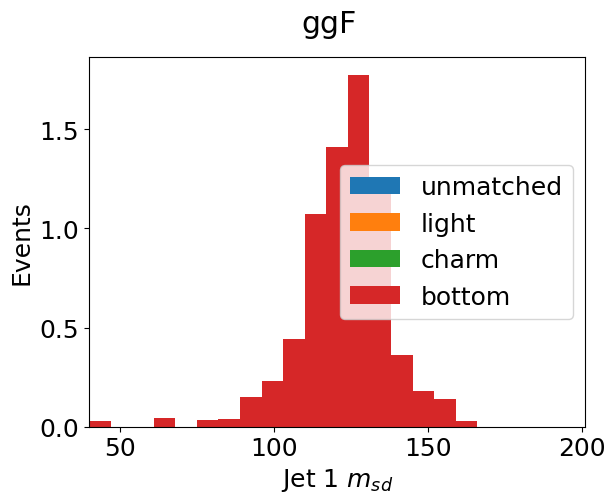

In [16]:
hist.plot1d(ggf.sum('msd2','genflavor2'),overlay='genflavor1',stack=True)
plt.legend(labels=labels)
plt.suptitle('ggF')
plt.savefig(year+'/ggf_pass_msd1.pdf',bbox_inches='tight')

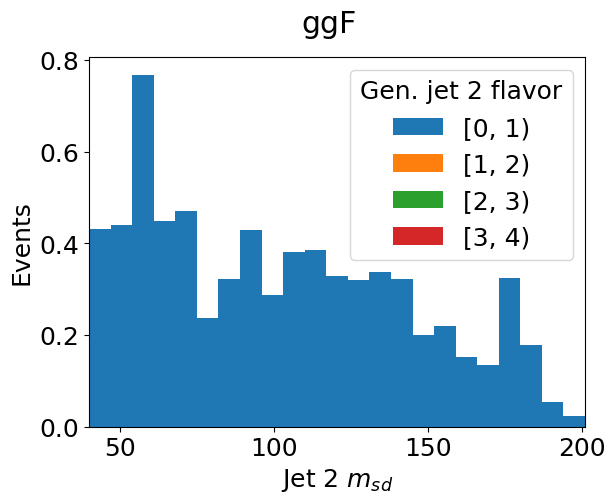

In [17]:
hist.plot1d(ggf.sum('msd1').sum('genflavor1'),overlay='genflavor2',stack=True)
plt.suptitle('ggF')
plt.savefig(year+'/ggf_pass_msd2.pdf',bbox_inches='tight')

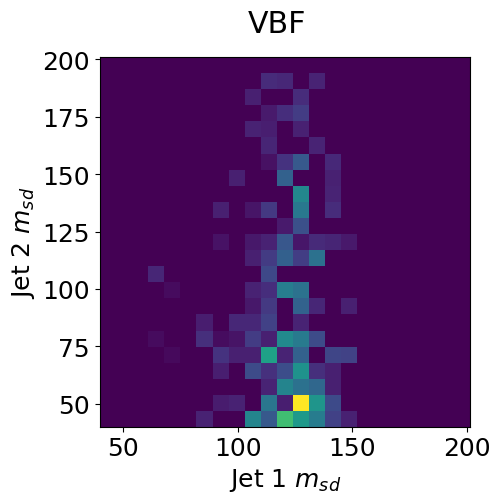

In [18]:
plt.imshow(vbf.sum('genflavor1','genflavor2').values()[()].transpose(),extent=[40,201,40,201],origin='lower')
plt.suptitle('VBF')
plt.xlabel(r'Jet 1 $m_{sd}$')
plt.ylabel(r'Jet 2 $m_{sd}$')
plt.savefig(year+'/vbf_pass_msd1_msd2.pdf',bbox_inches='tight')

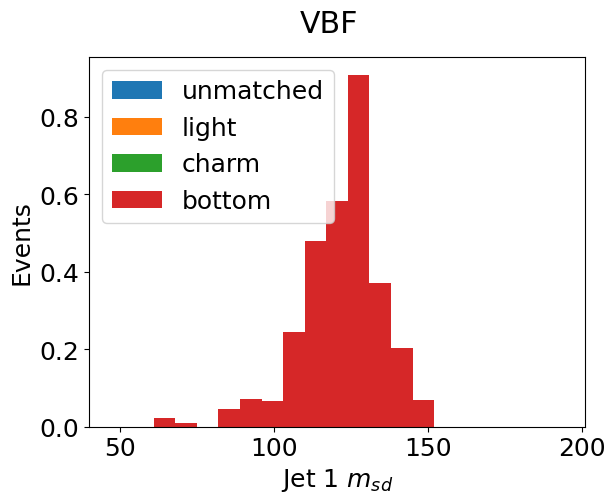

In [20]:
hist.plot1d(vbf.sum('msd2','genflavor2'),overlay='genflavor1',stack=True)
plt.legend(labels=labels)
plt.suptitle('VBF')
plt.savefig(year+'/vbf_pass_msd1.pdf',bbox_inches='tight')

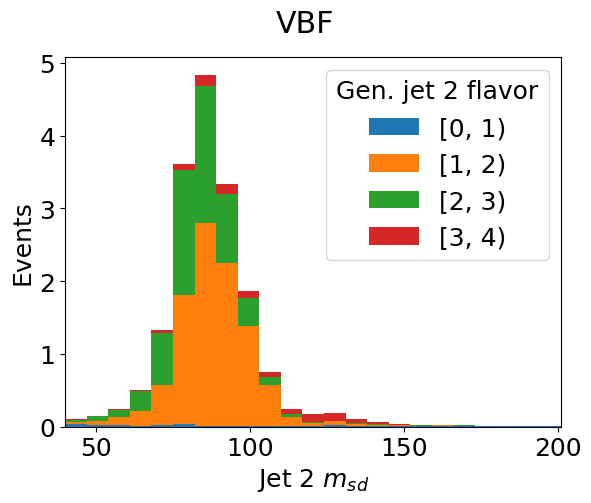

In [21]:
hist.plot1d(vh.sum('msd1').sum('genflavor1'),overlay='genflavor2',stack=True)
plt.suptitle('VBF')
plt.savefig(year+'/vbf_pass_msd2.pdf',bbox_inches='tight')

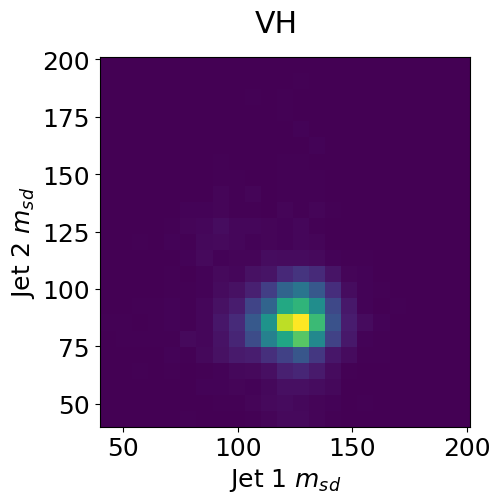

In [22]:
plt.imshow(vh.sum('genflavor1','genflavor2').values()[()].transpose(),extent=[40,201,40,201],origin='lower')
plt.suptitle('VH')
plt.xlabel(r'Jet 1 $m_{sd}$')
plt.ylabel(r'Jet 2 $m_{sd}$')
plt.savefig(year+'/vh_pass_msd1_msd2.pdf',bbox_inches='tight')

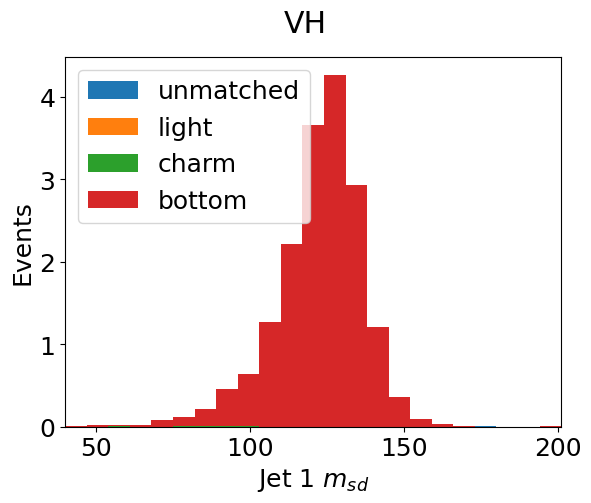

In [23]:
hist.plot1d(vh.sum('msd2','genflavor2'),overlay='genflavor1',stack=True)
plt.legend(labels=labels)
plt.suptitle('VH')
plt.savefig(year+'/vh_pass_msd1.pdf',bbox_inches='tight')

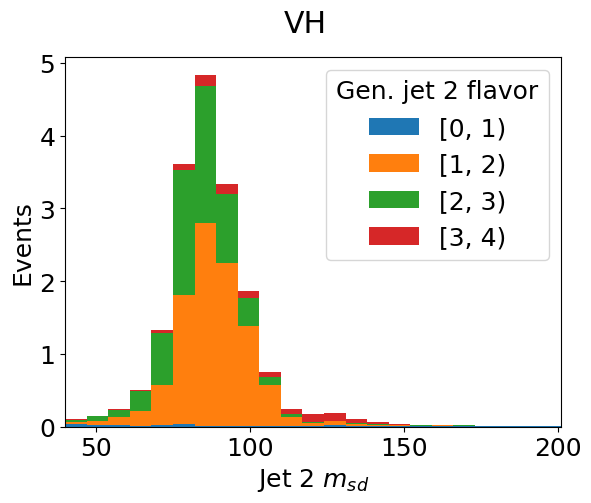

In [24]:
hist.plot1d(vh.sum('msd1').sum('genflavor1'),overlay='genflavor2',stack=True)
plt.suptitle('VH')
plt.savefig(year+'/vh_pass_msd2.pdf',bbox_inches='tight')

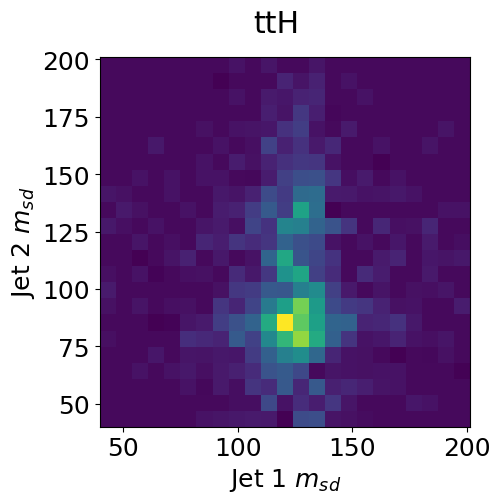

In [25]:
plt.imshow(tth.sum('genflavor1','genflavor2').values()[()].transpose(),extent=[40,201,40,201],origin='lower')
plt.suptitle('ttH')
plt.xlabel(r'Jet 1 $m_{sd}$')
plt.ylabel(r'Jet 2 $m_{sd}$')
plt.savefig(year+'/tth_pass_msd1_msd2.pdf',bbox_inches='tight')

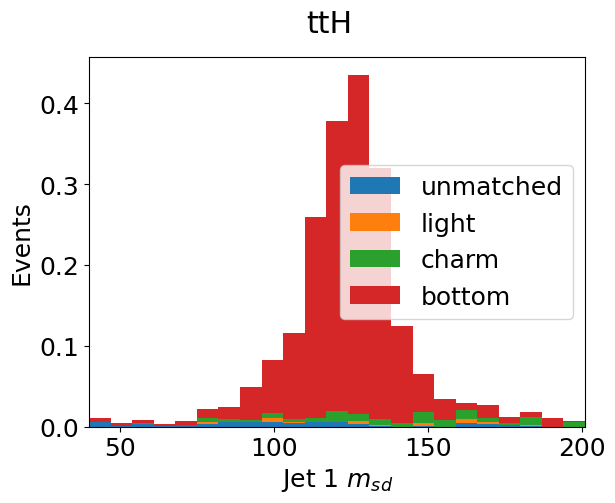

In [26]:
hist.plot1d(tth.sum('msd2','genflavor2'),overlay='genflavor1',stack=True)
plt.legend(labels=labels)
plt.suptitle('ttH')
plt.savefig(year+'/tth_pass_msd1.pdf',bbox_inches='tight')

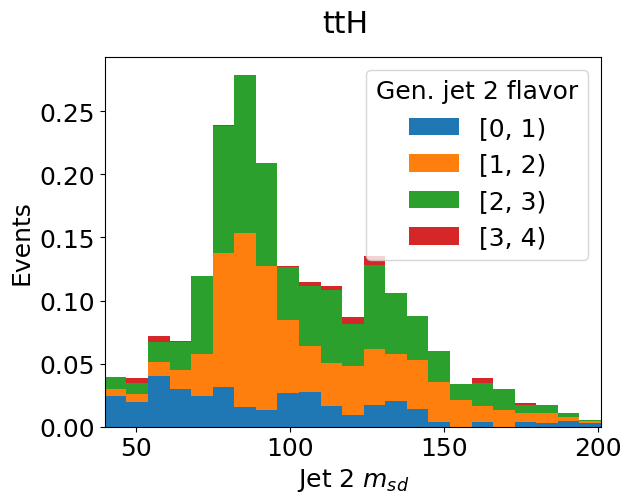

In [27]:
hist.plot1d(tth.sum('msd1').sum('genflavor1'),overlay='genflavor2',stack=True)
plt.suptitle('ttH')
plt.savefig(year+'/tth_pass_msd2.pdf',bbox_inches='tight')

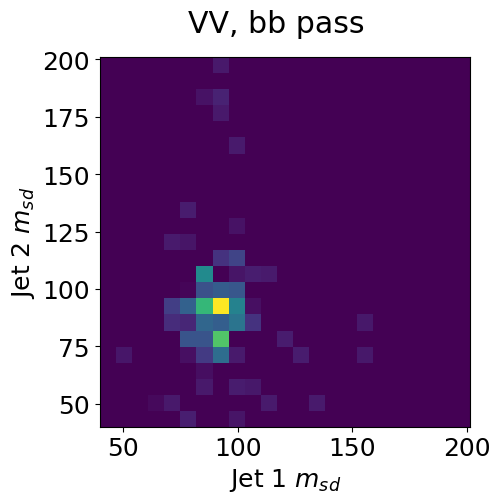

In [28]:
plt.imshow(vv.sum('genflavor1','genflavor2').values()[()].transpose(),extent=[40,201,40,201],origin='lower')
plt.suptitle('VV, bb pass')
plt.xlabel(r'Jet 1 $m_{sd}$')
plt.ylabel(r'Jet 2 $m_{sd}$')
plt.savefig(year+'/vv_pass_msd1_msd2.pdf',bbox_inches='tight')

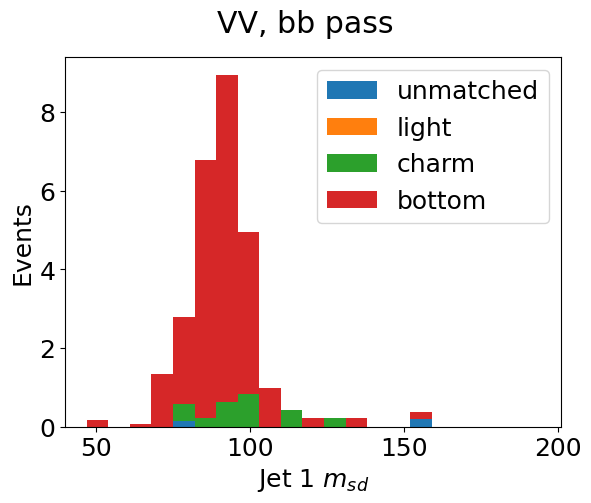

In [29]:
hist.plot1d(vv.sum('msd2','genflavor2'),overlay='genflavor1',stack=True)
plt.legend(labels=labels)
plt.suptitle('VV, bb pass')
plt.savefig(year+'/vv_pass_msd1.pdf',bbox_inches='tight')

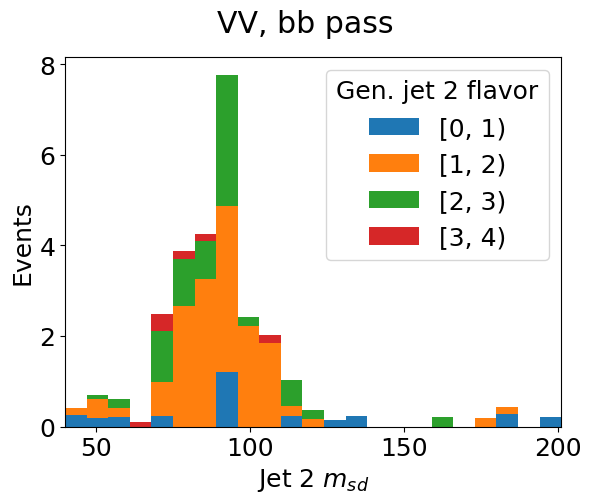

In [30]:
hist.plot1d(vv.sum('msd1').sum('genflavor1'),overlay='genflavor2',stack=True)
plt.suptitle('VV, bb pass')
plt.savefig(year+'/vv_pass_msd2.pdf',bbox_inches='tight')

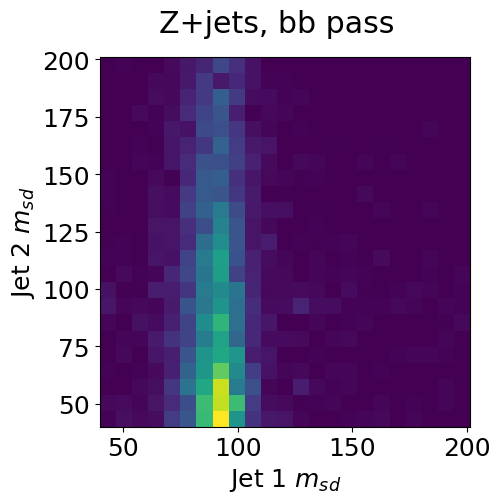

In [31]:
plt.imshow(zjets.sum('genflavor1','genflavor2').values()[()].transpose(),extent=[40,201,40,201],origin='lower')
plt.suptitle('Z+jets, bb pass')
plt.xlabel(r'Jet 1 $m_{sd}$')
plt.ylabel(r'Jet 2 $m_{sd}$')
plt.savefig(year+'/zjets_pass_msd1_msd2.pdf',bbox_inches='tight')

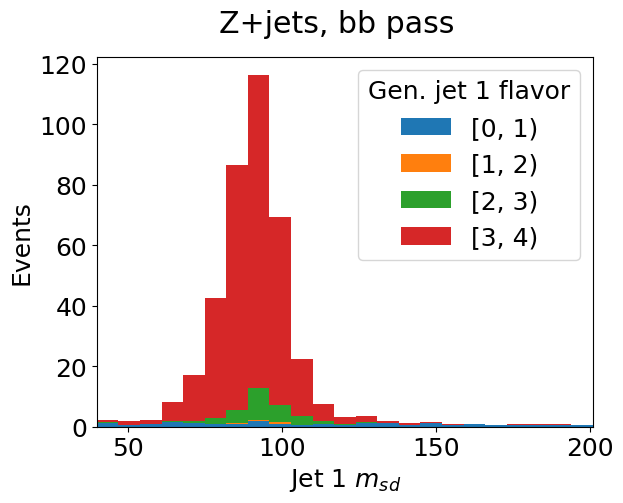

In [32]:
hist.plot1d(zjets.sum('msd2','genflavor2'),overlay='genflavor1',stack=True)
plt.suptitle('Z+jets, bb pass')
plt.savefig(year+'/zjets_pass_msd1.pdf',bbox_inches='tight')

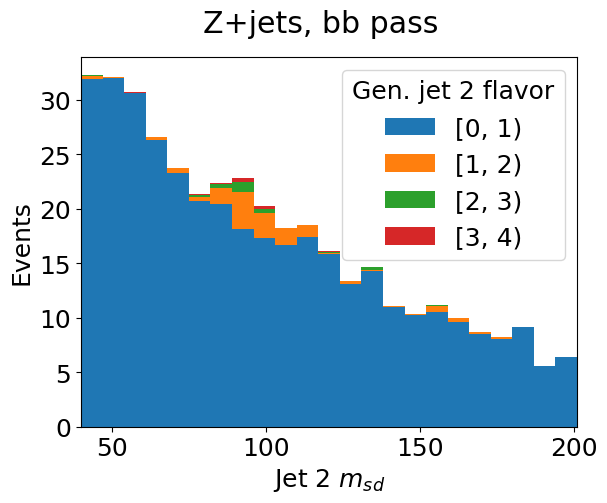

In [33]:
hist.plot1d(zjets.sum('msd1','genflavor1'),overlay='genflavor2',stack=True)
plt.suptitle('Z+jets, bb pass')
plt.savefig(year+'/zjets_pass_msd2.pdf',bbox_inches='tight')

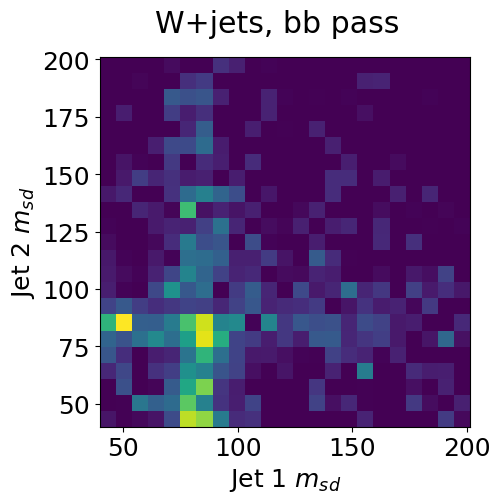

In [34]:
plt.imshow(wjets.sum('genflavor1','genflavor2').values()[()].transpose(),extent=[40,201,40,201],origin='lower')
plt.suptitle('W+jets, bb pass')
plt.xlabel(r'Jet 1 $m_{sd}$')
plt.ylabel(r'Jet 2 $m_{sd}$')
plt.savefig(year+'/wjets_pass_msd1_msd2.pdf',bbox_inches='tight')

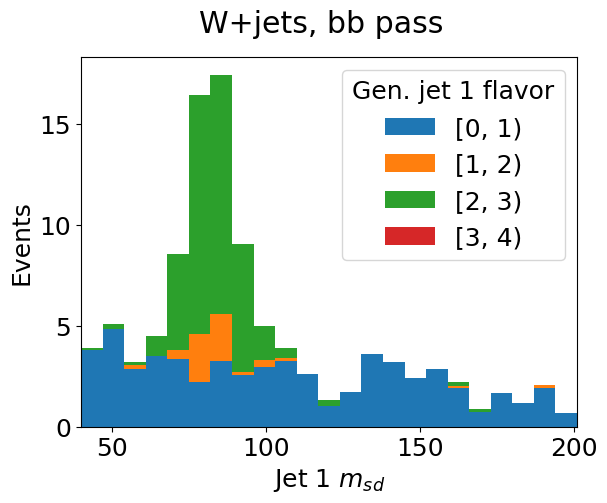

In [35]:
hist.plot1d(wjets.sum('msd2','genflavor2'),overlay='genflavor1',stack=True)
plt.suptitle('W+jets, bb pass')
plt.savefig(year+'/wjets_pass_msd1.pdf',bbox_inches='tight')

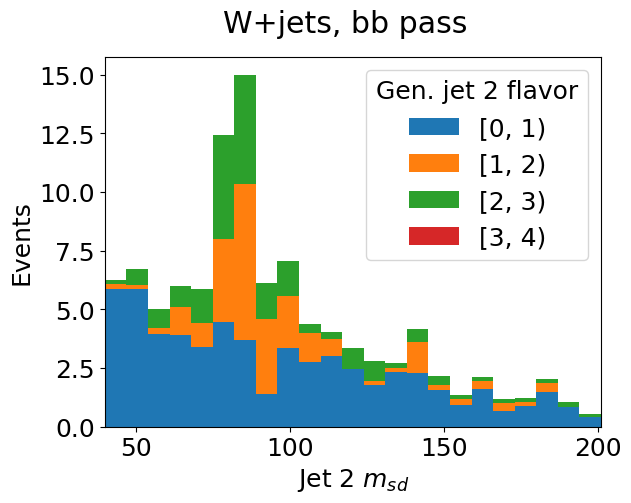

In [36]:
hist.plot1d(wjets.sum('msd1','genflavor1'),overlay='genflavor2',stack=True)
plt.suptitle('W+jets, bb pass')
plt.savefig(year+'/wjets_pass_msd2.pdf',bbox_inches='tight')

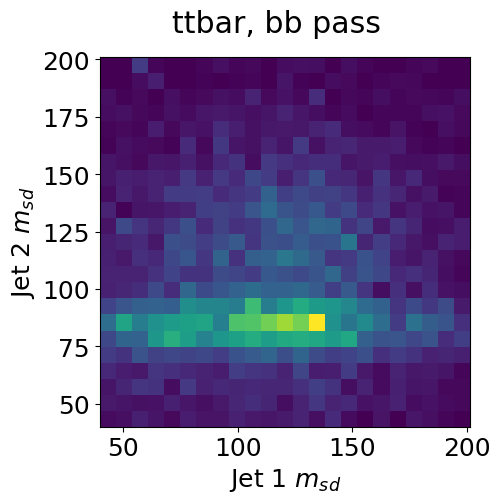

In [37]:
plt.imshow(ttbar.sum('genflavor1','genflavor2').values()[()].transpose(),extent=[40,201,40,201],origin='lower')
plt.suptitle('ttbar, bb pass')
plt.xlabel(r'Jet 1 $m_{sd}$')
plt.ylabel(r'Jet 2 $m_{sd}$')
plt.savefig(year+'/ttbar_pass_msd1_msd2.pdf',bbox_inches='tight')

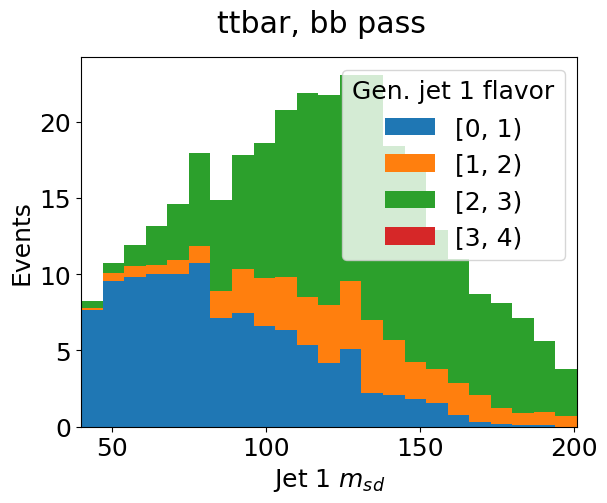

In [38]:
hist.plot1d(ttbar.sum('msd2','genflavor2'),overlay='genflavor1',stack=True)
plt.suptitle('ttbar, bb pass')
plt.savefig(year+'/ttbar_pass_msd1.pdf',bbox_inches='tight')

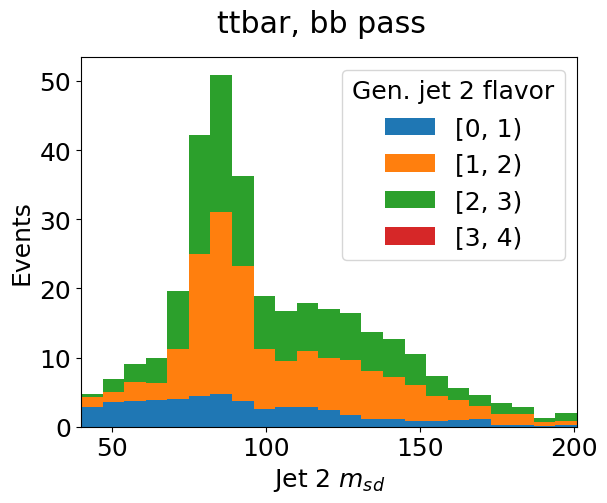

In [39]:
hist.plot1d(ttbar.sum('msd1','genflavor1'),overlay='genflavor2',stack=True)
plt.suptitle('ttbar, bb pass')
plt.savefig(year+'/ttbar_pass_msd2.pdf',bbox_inches='tight')

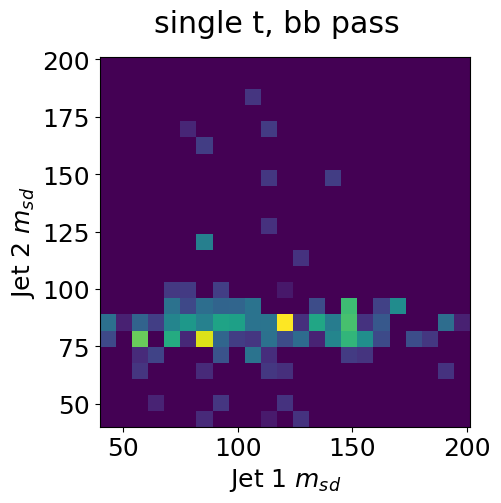

In [40]:
plt.imshow(singlet.sum('genflavor1','genflavor2').values()[()].transpose(),extent=[40,201,40,201],origin='lower')
plt.suptitle('single t, bb pass')
plt.xlabel(r'Jet 1 $m_{sd}$')
plt.ylabel(r'Jet 2 $m_{sd}$')
plt.savefig(year+'/singlet_pass_msd1_msd2.pdf',bbox_inches='tight')

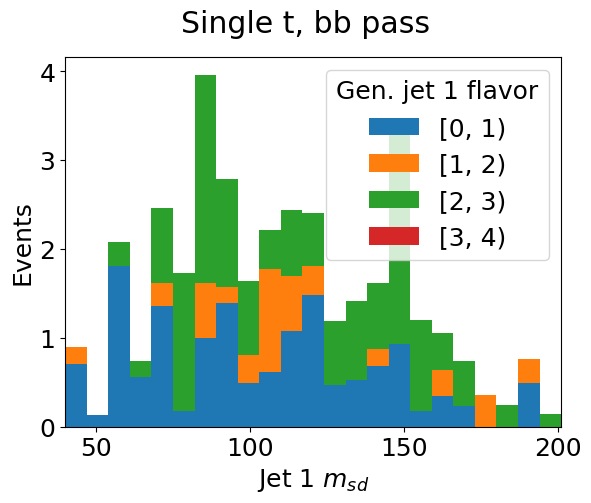

In [41]:
hist.plot1d(singlet.sum('msd2','genflavor2'),overlay='genflavor1',stack=True)
plt.suptitle('Single t, bb pass')
plt.savefig(year+'/singlet_pass_msd1.pdf',bbox_inches='tight')

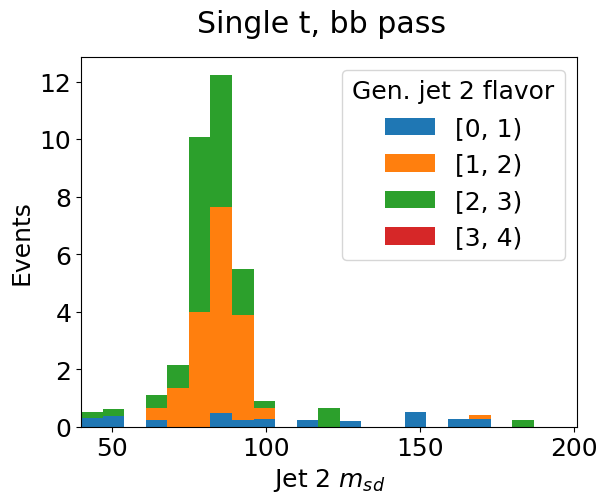

In [42]:
hist.plot1d(singlet.sum('msd1','genflavor1'),overlay='genflavor2',stack=True)
plt.suptitle('Single t, bb pass')
plt.savefig(year+'/singlet_pass_msd2.pdf',bbox_inches='tight')